In [8]:
import pystore
import yfinance as yf
import os

In [10]:
pystore.set_path('~/pystore')

<function pystore.utils.get_path(*args)>

In [11]:
pystore.list_stores()

[]

In [13]:
store = pystore.store('./my_data_source')

In [14]:
pystore.list_stores()

['my_data_source']

In [15]:
store.list_collections()

[]

In [16]:
collection = store.collection('DJIA')

In [17]:
collection.list_items()

set()

In [19]:
# let's get tickers
dow_tickers = ["BA", "UNH", "HD", "GS", "MCD", "AAPL", "V", "MMM", "IBM", 
               "TRV", "DIS", "MSFT", "UTX", "JNJ", "CAT", "AXP", "CVX", 
               "PG", "JPM", "WMT", "MRK", "NKE", "XOM", "CSCO", "VZ",
               "WBA", "KO", "INTC", "DOW", "PFE", ]

data = yf.download(
    tickers=dow_tickers,
    period='max',
    interval='1d',
    group_by='ticker',
    auto_adjust=True,
    prepost=True,
    threads=True,
    proxy=None,
)

[*********************100%***********************]  30 of 30 downloaded


In [20]:
aapl = data['AAPL']
collection.write('AAPL', aapl, metadata={'source': 'yfinance'})

In [22]:
collection.items

{'AAPL'}

In [23]:
item = collection.item('AAPL')
data = item.data
metadata = item.metadata

In [24]:
data

,Open,High,Low,Close,Volume
npartitions=1,,,,,
1962-01-02,float64,float64,float64,float64,float64
2019-08-02,...,...,...,...,...


In [26]:
df = item.to_pandas()
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-29,208.46,210.64,208.44,209.68,21673400.0
2019-07-30,208.76,210.16,207.31,208.78,33935700.0
2019-07-31,216.42,221.37,211.30,213.04,69281400.0
2019-08-01,213.90,218.03,206.74,208.43,53891700.0
2019-08-02,205.53,206.43,201.64,204.12,33951300.0


In [27]:
!pip3 install quantstats --upgrade --no-cache-dir

     |████████████████████████████████| 51kB 49.2MB/s eta 0:00:01
  Created wheel for quantstats: filename=QuantStats-0.0.18-cp37-none-any.whl size=36194 sha256=cbd0e4b15f4549f4d8ea7628e34ab59e2438e2c911b9e9250448937aa841831c
  Stored in directory: /tmp/pip-ephem-wheel-cache-u9me791j/wheels/e2/7f/e0/d38aefa675ed190ed88f78c152ac07eba0be97ef74a66d2551
  Created wheel for tabulate: filename=tabulate-0.8.3-cp37-none-any.whl size=23378 sha256=ed1f4f4ccc0f0e5de0c88bf589cd56a990cdf2e4f6b5133d0e888e8ad6b0f224
  Stored in directory: /tmp/pip-ephem-wheel-cache-u9me791j/wheels/2b/67/89/414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built quantstats tabulate


In [28]:
%matplotlib inline

import quantstats as qs

In [29]:
qs.extend_pandas()

In [30]:
stock = qs.utils.download_returns('FB')

In [32]:
stock.sharpe()

0.7853998341538829

In [33]:
qs.stats.sharpe(stock)

0.7853998341538829

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


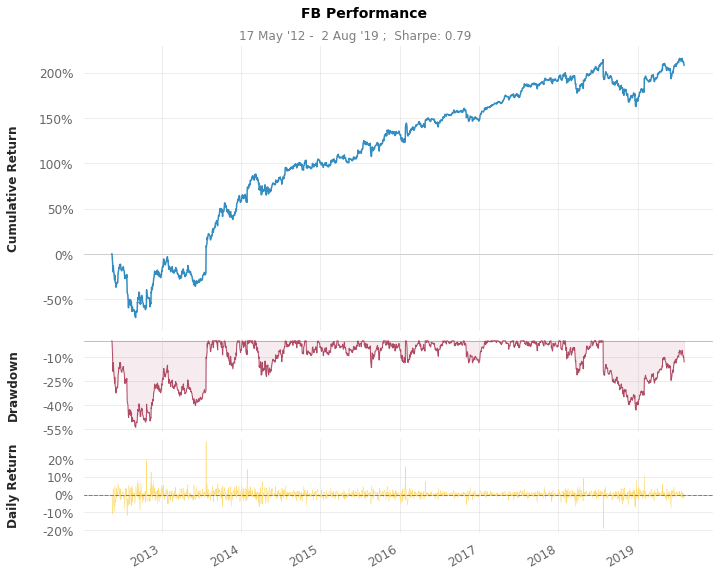

In [34]:
qs.plots.snapshot(stock, title='FB Performance')

In [35]:
qs.reports.html(stock, 'SPY')

/home/lass/envs/algo_env/lib/python3.7/site-packages/quantstats/stats.py:502: FutureWarning: The 'compound' method is deprecated and will beremoved in a future version.
  total_returns = returns.compound()


In [36]:
[f for f in dir(qs.stats) if f[0] != '_']

['avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'ror',
 'sharpe',
 'skew',
 'sortino',
 'tail_ratio',
 'to_drawdown_series',
 'ulcer_index',
 'ulcer_performance_index',
 'upi',
 'value_at_risk',
 'var',
 'volatility',
 'win_loss_ratio',
 'win_rate',
 'worst']

In [38]:
import ezibpy
import time

In [39]:
ibConn = ezibpy.ezIBpy()

In [49]:
ibConn.connect(clientId=100, host="71.192.254.225", port=7497)

In [43]:
# create some contracts using dedicated methods
stk_contract = ibConn.createStockContract("AAPL")

In [45]:
fut_contract = ibConn.createFuturesContract("ES", expiry="201909")
csh_contract = ibConn.createCashContract("EUR", currency="USD")
opt_contract = ibConn.createOptionContract("AAPL", expiry="20190925",
                                           strike=105.0, otype="PUT")

# ...or using a contract tuple
oil_contract = ibConn.createContract(("CL", "FUT", "NYMEX", "USD", "201606", 0.0, ""))

# request market data for all created contracts
ibConn.requestMarketData()


In [46]:
# wait 30 seconds
time.sleep(30)

# cancel market data request & disconnect
ibConn.cancelMarketData()
ibConn.disconnect()

In [48]:
import ezibpy
import time

# initialize ezIBpy
ibConn = ezibpy.ezIBpy()
ibConn.connect(clientId=100, host="71.192.254.225", port=7497)

# create a contract & request market depth
contract = ibConn.createCashContract("EUR", currency="USD")
ibConn.requestMarketDepth()

# wait 30 seconds
time.sleep(30)

# cancel market data request & disconnect
ibConn.cancelMarketData()
ibConn.disconnect()

2019-08-02 20:49:09,013 [ERROR] ezibpy: [#502] Couldn't connect to TWS.  Confirm that "Enable ActiveX and Socket Clients" is enabled on the TWS "Configure->API" menu.
2019-08-02 20:49:09,014 [ERROR] ezibpy: [#504] Not connected


In [51]:
ibConn.

False